In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize
from scipy.stats import norm, uniform, binom
from scipy.stats import gaussian_kde
from scipy.stats import multivariate_normal

%run tools.py

# Assignments 2


**Exercise 1**. Consider the model:

$$p(x|\theta)\propto \frac{1}{\sqrt{2\pi}}\exp(-\frac{(x_1-\theta)^2+(x_2-\theta)^2}{2}).$$

Find a Laplace approximation for this model, as seen for the Binomal model, and plot the resulting Gaussian approximation. Can you related this model to the posterior of the mean of a Gaussian as seen in class (Lesson 3)?

> ### **Exercise 1 Solution**:

## **Given:**

***Data Space:*** 

$ x \in (x_1, x_2) $

***Likelihood:***

$$p(x|\theta)\propto \frac{1}{\sqrt{2\pi}}\exp(-\frac{(x_1-\theta)^2+(x_2-\theta)^2}{2})$$

$$p(x|\theta)\propto \exp(-\frac{(x_1-\theta)^2}{2})* \exp(-\frac{(x_2-\theta)^2}{2})$$

***Observation/ Inference:***

$$ p(x| \theta) = p(x_1, x_2|\theta)  \approx p(x_1|\theta)* p(x_2|\theta) $$

With $ p(x_1|\theta) = p(x_2|\theta) = \mathcal{N} (\theta, 1)$ i.e., $x_1$ and $x_2$ are i.i.d's.

***Assumption for Prior:***

$p(\theta) = \mathcal{N} (\mu_0, \tau_0^{2})$ 

# **Posterior Evaluation**:

From Bayes Theorem:

$$ p(\theta|x) \propto p(x|\theta) * p(\theta)$$

## **Expected (theoretical) result from Lesson 3:**

Posterior takes the form $p(\theta|x)\sim \mathcal{N}(\mu_n,\sigma_n^2)$, with:


$$ \sigma_n^2 = \frac{1}{\frac{n}{\sigma^2} + \frac{1}{\tau_0^2}},$$

and,

$$ \mu_n = \frac{\frac{n \bar{x}}{\sigma^2} + \frac{\mu_0}{\tau_0^2}}{\frac{n}{\sigma^2} + \frac{1}{\tau_0^2}},$$


where $\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$, is the average of the observations.

In our case, $n= 2$ and $\sigma = 1$.

Therefore, our posterior is of the form:

$$p(\theta|x) \sim \mathcal{N} (\frac{x_1 + x_2 + \frac{\mu_0}{\tau_0^{2}}}{2 + \frac{1}{\tau_0^{2}}}, \frac{1}{2 + \frac{1}{\tau_0^{2}}}) \tag{1}$$

## **Laplace approximation:**

The funtion to be approximated is $f(\theta)$.

$$f (\theta)= p(\theta|x) \approx p(x|\theta) *p(\theta) \\
\propto \frac{1}{\sqrt{2\pi}}\exp(-\frac{(x_1-\theta)^2+(x_2-\theta)^2}{2}) * \frac{1}{\sqrt{2\pi}\tau_0} \exp(\frac{-1}{2\tau_0^{2}}(\theta - \mu_0)^{2}$$

$$f(\theta) \approx \exp(-(\frac{(x_1-\theta)^{2}+(x_2-\theta)^{2}}{2})-\frac{1}{2\tau_0^{2}}(\theta-\mu_0)^{2})$$

Now, $$g(\theta) = log(f(\theta))$$

$$
g(\theta) = -(\frac{(x_1-\theta)^{2}+(x_2-\theta)^{2}}{2})-\frac{1}{2\tau_0^{2}}(\theta-\mu_0)^{2}
$$

### **Calculating Mean:**

Differentiating $g(\theta)$ for the first time we get:

$$
g'(\theta) = (x_1 - \theta) + (x_2 - \theta) - \frac{1}{\tau_0^{2}}(\theta-\mu_0) \tag{2}
$$

$ g'(\theta)$ attains maximum at $\theta = \theta_0$ and $\theta_0$ can be solved by equating  $g'(\theta) = 0$ and $\theta_0$ is the mean of our approximated gaussian.

Therefore, ${g'(\theta) = 0}_{ |\theta= \theta_0} $ gives:

$$
x_1*\tau_0^{2} - 2\theta_0*\tau_0^{2} + x_2*\tau_0^{2} - (\theta_0-\mu_0) = 0
\\
\theta_0(-2\tau_0^{2}-1) = - (x_1\tau_0^{2}+x_2\tau_0^{2}+\mu_0)
\\
\theta_0 = \frac{x_1\tau_0^{2}+x_2\tau_0^{2}+\mu_0}{2\tau_0^{2}+1}
$$
$$ MEAN_{Laplace} = \theta_0 = \frac{x_1 +x_2 + \frac{\mu_0}{\tau_0^{2}}}{2 + \frac{1}{\tau_0^{2}}} \tag{3}$$

### **Calculating Variance:**

Differentiating equation $(2)$ again gives:

$$
g''(\theta) = -2-\frac{1}{\tau_0^{2}}
$$

The above function is independent of $\theta$. So, at $\theta = \theta_0$ we have:

$$
g''(\theta_0) = -2-\frac{1}{\tau_0^{2}} = \frac{-2\tau_0^{2}-1}{\tau_0^{2}}
$$

Variance our model is given by:
$$
\frac{-1}{g''(\theta_0)} = \frac{\tau_0^{2}}{2\tau_0^{2}+1}
$$

$$
VARIANCE_{Laplace}= \frac{-1}{g''(\theta_0)} = \frac{1}{2 + \frac{1}{\tau_0^{2}}} \tag{4}
$$

Finally, it is very clear from **$(1)$, $(3)$ and $(4)$** that the posterior of the model evaluated both mathematically and estimated through Laplace approximation follows the same Gaussian.

This exactness in two approaches can be attributed to:

- The closed form solution of posterior distribution is possible because our prior here is a conjugate prior. Hence we get the exact Gaussian distribution of our model.

- The fact that we are estimating a guassian (because we used a conjugate prior with gaussian distribution) with another gaussian (through Laplace approximation). So we will end up with the same Gaussian.





## **Plot of the posterior**

We plot the posterior distribution $p(\theta|x)$ by taking $x_1= 2$, $x_2= 8$ and prior $p(\theta) \sim \mathcal{N} (0, 5)$.

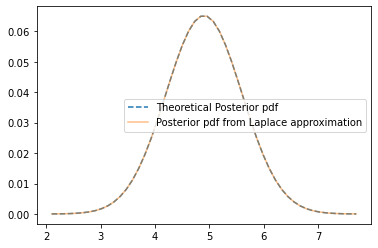

In [2]:
# Intializing x_1 and x_2
x1 = 2
x2 = 8
# Initializing Prior
mu0 = 0
tau0 = 5

variance = tau0**2/(2*tau0**2+1)
std = math.sqrt(variance)
mean = (x1*tau0**2+x2*tau0**2+mu0)/(2*tau0**2+1)

theta = np.linspace(mean-std*4,mean+std*4)

f = np.exp(
    -((x1-theta)**2+(x2-theta)**2)/2
    -(theta-mu0)**2/(2*tau0**2)
)
plt.plot(theta, f/np.sum(f), label='Theoretical Posterior pdf', linestyle= 'dashed' )

laplace_approx = norm(mean, std)
laplace_values = laplace_approx.pdf(theta)

plt.plot(theta, laplace_values/np.sum(laplace_values), label='Posterior pdf from Laplace approximation', alpha = 0.5)

plt.legend()
plt.show()

**As you can see from the above plot that both posteriors from theoretical and Laplace approximation are identical.**

**Exercise 2**. Write down a model to evaluate the claim: *Animal diversity is related to latitude, but only after controlling for plant diversity*. You just need to write down the model definition.

> ### **Exercise 2 Solution**:

Let us define the Animal diversity of a subject of interest, $i$ as, $$A_i$$

If we assume Animal diversity follows a Gaussian distribution with mean, $\mu_i$, and common variance (noise), $\sigma^2$, then $$A_i \sim \mathcal{N} (\mu_i,\sigma^2) \tag{1}$$

Now, if we need to evaluate the claim that $A_i$ depends on Latitude, say $L_i$ but only after controlling for plant diversity, say $P_i$. This essentially means that $A_i$ indirectly depends on $P_i$ as well.

For simplicity, we assume that the type of control on $P_i$ to be linear.

The relationship between $A_i$ and $L_i$ can be explored using a suitable function $f_\theta$ that controls $P_i$ and maps $L_i$ to $A_i$.

$$A_i = f_\theta(P_i,L_i) $$

Where, $\theta$ is the parameteric space of $f$ required to establish the relationship between $A_i$, $L_i$ and $P_i$.

Considering $f$ to follow a simple multi-variate polynomial regression model, we can formulate the mean $\mu_i$ as:$$\mu_i = \alpha + \beta P_i + \gamma_{1} L_i + \gamma_2 L_i^2+ \cdots + \gamma_n L_i^n \tag{2}$$

Therefore, our model is defined by $(1)$ and $(2)$.

Our parameter space $\theta \in (\sigma, \alpha, \beta, \gamma_1, \gamma_2, \cdots, \gamma_n)$, and suitable priors can be assumed on all these parameters to do our Bayesian analysis.

We can assume a uniform distribution on $\sigma$ and gaussian on all other parameters. (This depends on our belief about these parameters, any other suitable distribution can be taken).

**Priors:**
$$p(\sigma) = \mathcal{U} (0, a)$$
$$p(\alpha) = \mathcal{N} (\mu_\alpha, \sigma_\alpha^{2})$$
$$p(\beta) = \mathcal{N} (\mu_\beta, \sigma_\beta^{2})$$
$$p(\gamma_1) = \mathcal{N} (\mu_{\gamma_1}, \sigma_{\gamma_1}^{2})$$
$$\cdots $$
$$p(\gamma_n) = \mathcal{N} (\mu_{\gamma_n}, \sigma_{\gamma_n}^{2})$$

**Remark:**
- The model described above is very generalistic and in most of the cases considering a linear ($n$ until $1$) or quadratic ($n$ until $2$) sufficies. But this needs to be checked through likelihood by evaluating the posteriors with different set of parameters and choosing the optimal choice of parameters.

- The higher the total number of parameters the more complex our model becomes, so care must be taken to see that we are not over-complicating our analysis.




**Exercise 3.** The attached data is about observations of urban foxes in human habitat. The data has 5 columns:

- *group*: Number of social group the fox belongs to
- *avgfood*: The avg amount of food available in the territory
- *groupsize*: The number of foxes in the social group
- *area*: Size of the territory
- *weight*: Body weight of the fox

Fit a regression for *weight* as a linear function of *area*, and a regression for *weight* as a linear function of *groupsize*. What can you say about these relationships? Run a multivariate model with both variables, what can you conclude about this analysis?

In [3]:
data = pd.read_csv('data_assignments2.csv')
data

,group,avgfood,groupsize,area,weight
0,1,0.37,2,1.09,5.02
1,1,0.37,2,1.09,2.84
2,2,0.53,2,2.05,5.33
3,2,0.53,2,2.05,6.07
4,3,0.49,2,2.12,5.85
...,...,...,...,...,...
111,29,0.67,4,2.75,4.81
112,29,0.67,4,2.75,3.94
113,30,0.41,3,1.91,3.16
114,30,0.41,3,1.91,2.78


## Linear model for Weight and Area

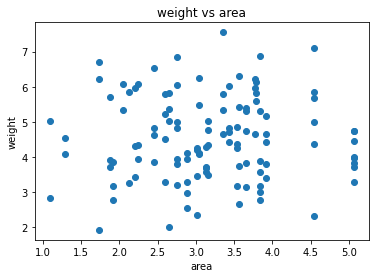

In [4]:
# Visualization
mean_area = np.mean(data.area)
data['area_centered'] = data.area-mean_area
plt.scatter(data.area, data.weight)
plt.title('weight vs area')
plt.xlabel('area')
plt.ylabel('weight')
plt.show()

**Model:**
$$
w_i = a + b * r_i
$$

Let us assume that $w_i$ follows a gaussian.
$$
w_i\sim \mathcal{N}(\mu_i,\sigma^2)
$$

**Priors:**
$$  p(a) \sim  \mathcal{N}(4,144)$$
$$  p(b) \sim \mathcal{N}(0,100) $$
$$  p(\sigma) \sim \mathcal{U}(0,20) $$


In [5]:
expr = 'weight ~  area_centered'

likelihood = 'gaussian'

prior_a_mean = 4
prior_a_sigma = 12
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 10
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

prior_sigma_inf = 0
prior_sigma_sup = 20
prior_sigma = ['uniform', [prior_sigma_inf, prior_sigma_sup]]

priors = [prior_a, prior_b, prior_sigma]

solution_regression_area = laplace_solution_regression(expr, data, likelihood, priors)

posterior_samples = multivariate_normal.rvs(
    solution_regression_area[0],
    solution_regression_area[1],
    size=10000
)

post_quantiles = np.quantile(posterior_samples, [0.025, 0.975], axis=0).transpose()
post_stds = np.std(posterior_samples, axis=0)
post_means = np.mean(posterior_samples, axis=0)

summary_stats_area = [post_means, post_stds, post_quantiles]

summary_stats_area = pd.DataFrame(summary_stats_area).transpose()
summary_stats_area.columns = ['mean', 'SD', '95% CI']
summary_stats_area.rename(index={0:'a',1:'b', 2:'sigma'}, inplace=True)
summary_stats_area

C:\Users\bharg\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\bharg\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\bharg\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 193.28921449309814
 hess_inv: array([[ 1.19242840e-02, -8.87193657e-05, -1.94219963e-05],
       [-8.87193657e-05,  1.38011866e-02,  2.43576649e-07],
       [-1.94219963e-05,  2.43576649e-07,  5.99560445e-03]])
      jac: array([ 3.81469727e-06,  0.00000000e+00, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 168
      nit: 13
     njev: 39
   status: 0
  success: True
        x: array([4.52961112, 0.02483785, 1.17868433])


,mean,SD,95% CI
a,4.529563,0.109399,"[4.311649831462422, 4.7408893774040015]"
b,0.023145,0.117446,"[-0.20690434999239157, 0.2504445806200054]"
sigma,1.177872,0.077236,"[1.0262081163729295, 1.3299803820481575]"


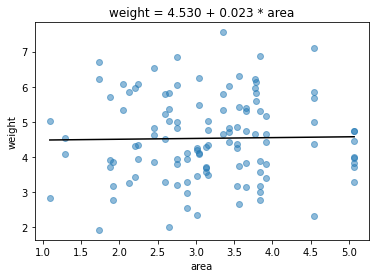

In [6]:
area_range = np.linspace(min(data.area_centered), max(data.area_centered))

bp_prediction_quadratic = summary_stats_area['mean']['a'] + summary_stats_area['mean']['b'] * area_range

plt.plot(area_range + mean_area, bp_prediction_quadratic, color='black')
plt.scatter(data.area, data.weight, alpha=0.5)
plt.title(f"weight = {summary_stats_area['mean']['a']:.3f} + {summary_stats_area['mean']['b']:.3f} * area")
plt.ylabel('weight')
plt.xlabel('area')
plt.show()

The above graph shows that the weight is almost constant with varying area (which is not true). This model does not represent the true data very well i.e., **weight is not linearly related to area**.

Also, this fact can be confirmed from the $95$ % CI, where $b$ is very close to Zero with mean $0.023$ and appears to be symmetric around $0$ (which can be found in the range).

## Linear model for Weight and Group Size

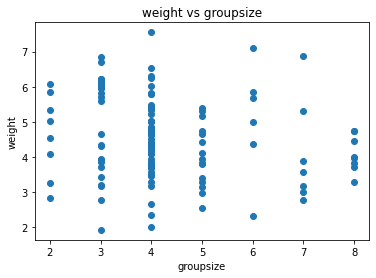

In [7]:
# Data Visualization
mean_groupsize = np.mean(data.groupsize)
data['groupsize_center'] = data.groupsize-mean_groupsize
plt.scatter(data.groupsize, data.weight)
plt.title('weight vs groupsize')
plt.xlabel('groupsize')
plt.ylabel('weight')
plt.show()

**Model:**
$$
w_i = a + c * g_i
$$

Let us assume that $w_i$ follows a gaussian.
$$
w_i\sim \mathcal{N}(\mu_i,\sigma^2)
$$

**Priors:**
$$  p(a) \sim  \mathcal{N}(4,225)$$
$$  p(c) \sim \mathcal{N}(0,256) $$
$$  p(\sigma) \sim \mathcal{U}(0,30) $$

In [8]:
expr = 'weight ~  groupsize_center'

likelihood = 'gaussian'

prior_a_mean = 4
prior_a_sigma = 15
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_c_mean = 0
prior_c_sigma = 16
prior_c = ['gaussian', [prior_c_mean, prior_c_sigma]]

prior_sigma_inf = 0
prior_sigma_sup = 30
prior_sigma = ['uniform', [prior_sigma_inf, prior_sigma_sup]]

priors = [prior_a, prior_c, prior_sigma]

solution_regression_gs = laplace_solution_regression(expr, data, likelihood, priors)

posterior_samples = multivariate_normal.rvs(
    solution_regression_gs[0],
    solution_regression_gs[1],
    size=10000
)

post_quantiles = np.quantile(posterior_samples, [0.025, 0.975], axis=0).transpose()
post_stds = np.std(posterior_samples, axis=0)
post_means = np.mean(posterior_samples, axis=0)

summary_stats_gs = [post_means, post_stds, post_quantiles]

summary_stats_gs = pd.DataFrame(summary_stats_gs).transpose()
summary_stats_gs.columns = ['mean', 'SD', '95% CI']
summary_stats_gs.rename(index={0: 'a', 1: 'c', 2: 'sigma'}, inplace=True)
summary_stats_gs

C:\Users\bharg\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 192.88638359725257
 hess_inv: array([[ 1.15957039e-02, -7.25769638e-05,  4.20623059e-05],
       [-7.25769638e-05,  4.79152905e-03,  3.93020524e-05],
       [ 4.20623059e-05,  3.93020524e-05,  5.82030649e-03]])
      jac: array([-1.90734863e-06,  0.00000000e+00, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 122
      nit: 19
     njev: 29
   status: 0
  success: True
        x: array([ 4.5296277 , -0.12389676,  1.1635296 ])


,mean,SD,95% CI
a,4.529205,0.106989,"[4.319468898551508, 4.736610216847547]"
c,-0.123767,0.069357,"[-0.2607318284670728, 0.010637334108151575]"
sigma,1.163119,0.075976,"[1.0120334826175317, 1.3109370853370172]"


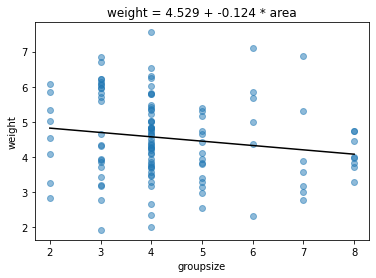

In [9]:
groupsize_range = np.linspace(min(data.groupsize_center), max(data.groupsize_center))


bp_prediction_quadratic = summary_stats_gs['mean']['a'] + summary_stats_gs['mean']['c'] * groupsize_range

plt.plot(groupsize_range+mean_groupsize, bp_prediction_quadratic, color='black')
plt.scatter(data.groupsize, data.weight, alpha=0.5)
plt.title(f"weight = {summary_stats_gs['mean']['a']:.3f} + {summary_stats_gs['mean']['c']:.3f} * area")
plt.ylabel('weight')
plt.xlabel('groupsize')
plt.show()

The above graph and $95$ % CI shows that there is a slight negative linear relationship between weight and Group Size. But still this relationship is not meaningful as their is no clear trend observed from the plots. A better idea of linear relationship can be obtained by plotting the variability curves for both of these models.

## Overall Variability of the Linear models w.r.t Area and Group Size:

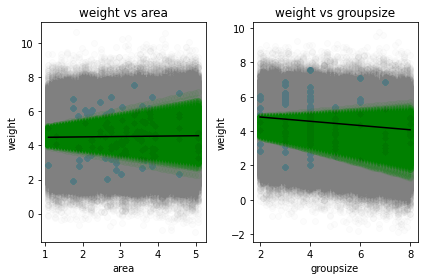

In [10]:
# WEIGHT VS AREA

weight_prediction_by_area = summary_stats_area['mean']['a'] + summary_stats_area['mean']['b'] * area_range

plt.subplot(1,2,1)
plt.plot(area_range+mean_area, weight_prediction_by_area, color='black')
plt.scatter(data.area, data.weight)
plt.title('weight vs area')
plt.ylabel('weight')
plt.xlabel('area')


posterior_samples_area = multivariate_normal.rvs(
    solution_regression_area[0],
    solution_regression_area[1],
    size=10000
)

prediction_range = []
prediction_range_noise = []

area_range_decentr = area_range + mean_area
for area in area_range_decentr:
    pred_mean_data = posterior_samples_area[:,0]+posterior_samples_area[:,1]*area
    prediction_range.append(
        pred_mean_data
    )
    prediction_range_noise.append( norm.rvs(
        pred_mean_data, posterior_samples_area[:,2]
    )
    )

for i, area in enumerate(area_range_decentr):
    scatter = np.repeat(area, 10000)
    plt.scatter(scatter, prediction_range_noise[i], alpha=0.025, color='grey')
    plt.scatter(scatter, prediction_range[i], alpha=0.05, color='green')



# QUADRATIC
weight_prediction_by_gs = summary_stats_gs['mean']['a'] + summary_stats_gs['mean']['c'] * groupsize_range

plt.subplot(1,2,2)
plt.plot(groupsize_range+mean_groupsize, weight_prediction_by_gs, color='black')
plt.scatter(data.groupsize, data.weight)
plt.title('weight vs groupsize')
plt.ylabel('weight')
plt.xlabel('groupsize')


posterior_samples_gs = multivariate_normal.rvs(
    solution_regression_gs[0],
    solution_regression_gs[1],
    size=10000
)

prediction_range = []
prediction_range_noise = []

gs_range_decentr = groupsize_range+mean_groupsize
for gs in gs_range_decentr:
    pred_mean_data = posterior_samples_gs[:,0]+        posterior_samples_gs[:,1]*gs
    prediction_range.append(
        pred_mean_data
    )
    prediction_range_noise.append( norm.rvs(
        pred_mean_data, posterior_samples_gs[:,2]
    )
    )

for i, gs in enumerate(gs_range_decentr):
    scatter = np.repeat(gs, 10000)
    plt.scatter(scatter, prediction_range_noise[i], alpha=0.025, color='grey')
    plt.scatter(scatter, prediction_range[i], alpha=0.05, color='green')

plt.tight_layout()
plt.show()

**The plots above show that the variability of mean prediction (due to regression coefficients) increases with increase in values of area and groupsize respectively. This behaviour is not desirable as the model becomes less stable at higher values. Also, in both models the slope is very less and very close to zero and zero is contained in the $95$% CI. This re-establishes the fact that both these Linear models are not very good predictors**

## Multivarate model for groupsize and area w.r.t weight

**Model:**

$$
w_i = a + b * r_i + c * g_i
$$

**priors:**
$$ p(a) = \mathcal{N}(0,400) $$
$$ p(b) = \mathcal{N}(0,400) $$
$$ p(c) = \mathcal{N}(0,400) $$
$$ p(\sigma) = \mathcal{U}(0,30) $$



In [11]:
expr = 'weight ~ area_centered + groupsize_center'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters
prior_a_mean = 0
prior_a_sigma = 20
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 20
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

prior_c_mean = 0
prior_c_sigma = 20
prior_c = ['gaussian', [prior_c_mean, prior_c_sigma]]

sigma_inf = 0
sigma_sup = 30
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b, prior_c, prior_sigma]

solution_regression = laplace_solution_regression(expr, data, likelihood, priors)

posterior_samples = multivariate_normal.rvs(
    solution_regression[0],
    solution_regression[1],
    size=10000
)

post_quantiles = np.quantile(posterior_samples, [0.025, 0.975], axis=0).transpose()
post_stds = np.std(posterior_samples, axis=0)
post_means = np.mean(posterior_samples, axis=0)

summary_stats = [post_means, post_stds, post_quantiles]

summary_stats = pd.DataFrame(summary_stats).transpose()
summary_stats.columns = ['mean', 'SD', '95% CI']
summary_stats.rename(index={0: 'a', 1: 'b_area', 2: 'c_gs', 3: 'sigma'}, inplace=True)
summary_stats

      fun: 192.75392775827726
 hess_inv: array([[ 1.04173672e-02, -4.61870693e-04,  8.53748099e-05,
         1.26785286e-04],
       [-4.61870693e-04,  3.73521901e-02, -1.93969048e-02,
         9.57984736e-05],
       [ 8.53748099e-05, -1.93969048e-02,  1.39615015e-02,
         2.37826350e-04],
       [ 1.26785286e-04,  9.57984736e-05,  2.37826350e-04,
         5.24497958e-03]])
      jac: array([ 0.00000000e+00,  7.62939453e-06,  7.62939453e-06, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 190
      nit: 28
     njev: 38
   status: 0
  success: True
        x: array([ 4.52953307,  0.61807054, -0.43254577,  1.11845006])


,mean,SD,95% CI
a,4.530054,0.101376,"[4.332860884505303, 4.729994913027843]"
b_area,0.614472,0.193516,"[0.23587285244088652, 0.9899742152106671]"
c_gs,-0.429829,0.118186,"[-0.6602818343690721, -0.19470273049632503]"
sigma,1.119179,0.072182,"[0.9788269514314905, 1.2634674106371844]"


**The multi-variate model shows with $95$ % certainity that there is positive relation among weight and area, and negative relation among weight and groupsize (when area and groupsize are considered together). The only drawback of this model is that the variance in prediction of coefficients $b_{area}$ and $c_{gs}$ almost doubled when compared to that of Uni-variate models. Let us plot correlations among these variables to understand why there is higher variance in multi-variate model**

## Correlation among Weight, Area and GroupSize

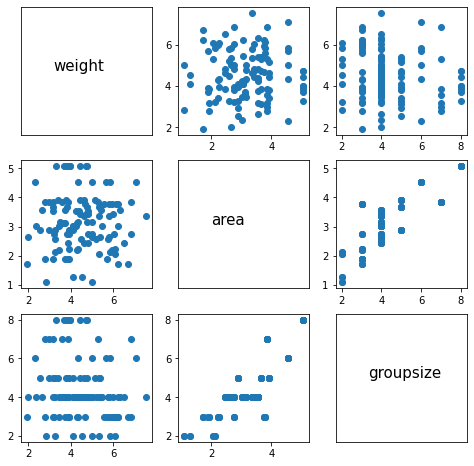

In [12]:
fields = ['weight', 'area', 'groupsize']

plt.figure(figsize=(8,8))

for i, field in enumerate(fields):

    for j in range(len(fields)):

        plt.subplot(len(fields), len(fields), len(fields)*i + j + 1)

        if i==j:
            plt.text(0.25,0.5, field, fontsize=15)
            plt.xticks([])
            plt.yticks([])
        else:
            plt.scatter(data[fields[j]],data[field])

In [13]:
from scipy.stats import pearsonr

print(f"Correlation coefficient between weight and area {pearsonr(data['weight'], data['area'])[0]}")
print(f"Correlation coefficient between weight and groupsize {pearsonr(data['weight'], data['groupsize'])[0]}")
print(f"Correlation coefficient between area and groupsize {pearsonr(data['area'], data['groupsize'])[0]}")

Correlation coefficient between weight and area 0.019477275696463098
Correlation coefficient between weight and groupsize -0.1609937575281722
Correlation coefficient between area and groupsize 0.8275944775941649


**As you can see from above the correlation among weight and area or weight and groupsize is very less and that is the reason the individual linear models couldn't able to extract any meaningful relationship**

**However, when both area and groupsize are used together that resulted in a better predictive model because of higher correlation among them. (Higher correlation sometimes might result in feeding the model with redundant information but in our case this did not happen, since individually these variables did not form an equivalent performing model)**

**The higher variance in the multi-variate model can be attributed to the uneven, limited or imbalanced data that is available for posterior analysis**

**Exercise 4.** Consider the diabetes dataset

In [14]:
from sklearn import datasets
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, uniform
from scipy.special import logsumexp

%run tools.py

dataset = datasets.load_diabetes(return_X_y=False)
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [15]:
# Define the feature matrix
data = dataset.data
# Define the target
target = dataset.target

Investigate the relationship between age (data[:,0]) and Average blood pressure (data[:,3]) with a linear and quadratic model. 

- Which model do you think is better? 
- Predict a 95% confidence interval for the average blood pressure on an individual with mean age (0). 



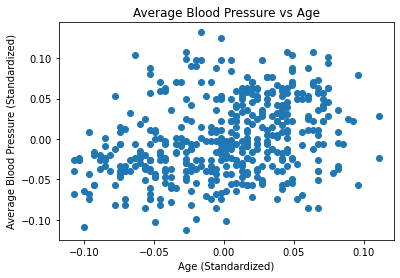

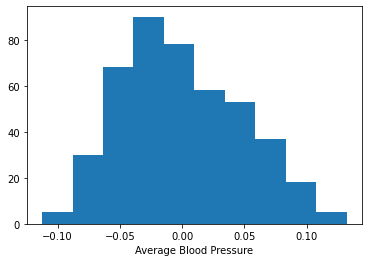

In [16]:
age = data[:,0]
bp = data[:,3]
data_analysis = pd.DataFrame({'age':age, 'bp':bp})

plt.scatter(age, bp)
plt.title('Average Blood Pressure vs Age')
plt.xlabel('Age (Standardized)')
plt.ylabel('Average Blood Pressure (Standardized)')
plt.show()
plt.hist(bp)
plt.xlabel('Average Blood Pressure')
plt.show()

## Linear model:
$$bp = a + b * age$$

**Priors:**
$$p(a) \sim \mathcal{N}(0,4)$$
$$p(b) \sim \mathcal{N}(0,4)$$
$$p(\sigma) \sim \mathcal{U}(0,2)$$

In [17]:
from tools import laplace_solution_regression

expr = 'bp ~  age'

likelihood = 'gaussian'

prior_a_mean = 0
prior_a_sigma = 2
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 2
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

prior_sigma_inf = 0
prior_sigma_sup = 2
prior_sigma = ['uniform', [prior_sigma_inf, prior_sigma_sup]]

priors = [prior_a, prior_b, prior_sigma]

solution_regression_linear = laplace_solution_regression(expr, data_analysis, likelihood, priors)

posterior_samples = multivariate_normal.rvs(
    solution_regression_linear[0],
    solution_regression_linear[1],
    size=10000
)

post_quantiles = np.quantile(posterior_samples, [0.025, 0.975], axis=0).transpose()
post_stds = np.std(posterior_samples, axis=0)
post_means = np.mean(posterior_samples, axis=0)

summary_stats = [post_means, post_stds, post_quantiles]

summary_stats = pd.DataFrame(summary_stats).transpose()
summary_stats.columns = ['mean', 'SD', '95% CI']
summary_stats.rename(index={0: 'a', 1: 'b', 2: 'sigma'}, inplace=True)
summary_stats

C:\Users\bharg\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -741.4558152479607
 hess_inv: array([[ 4.40160474e-06, -1.24908101e-06, -1.13041103e-07],
       [-1.24908101e-06,  1.78779527e-03,  1.61182454e-06],
       [-1.13041103e-07,  1.61182454e-06,  2.28377090e-06]])
      jac: array([-7.62939453e-06,  0.00000000e+00,  7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 199
      nit: 41
     njev: 48
   status: 0
  success: True
        x: array([-7.48081471e-09,  3.35259286e-01,  4.48095030e-02])


,mean,SD,95% CI
a,0.000013,0.002086,"[-0.004057117177118824, 0.004106075659653419]"
b,0.335621,0.042103,"[0.2539699903912788, 0.4177325517990027]"
sigma,0.044809,0.001522,"[0.04184371502167927, 0.04782060175657871]"


**From the $95$ % CI it is clear that the coefficient $b$ is positive almost surely. Therefore, age is positively related to Average blood pressure. The intercept $a$ is very close to Zero.**


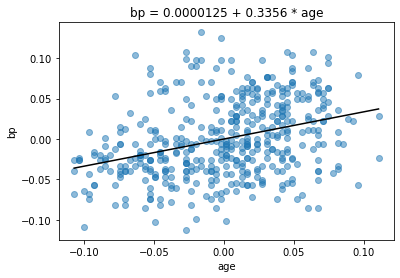

In [18]:
area_range = np.linspace(min(data_analysis.age), max(data_analysis.age))

bp_prediction_linear = summary_stats['mean']['a'] + summary_stats['mean']['b'] * area_range

plt.plot(area_range, bp_prediction_linear, color='black')
plt.scatter(data_analysis.age, data_analysis.bp, alpha=0.5)
plt.title(f"bp = {summary_stats['mean']['a']:.7f} + {summary_stats['mean']['b']:.4f} * age")
plt.ylabel('bp')
plt.xlabel('age')
plt.show()

## **Quadratic Model:**
$$
bp = a + b * age + c * age^{2}
$$

**Priors:**
$$p(a) \sim \mathcal{N}(0,4)$$
$$p(b) \sim \mathcal{N}(0,9)$$
$$p(c) \sim \mathcal{N}(0,9)$$
$$p(\sigma) \sim \mathcal{U}(0,2)$$

In [19]:
expr = 'bp ~  age + age2'

data_analysis['age2'] = data_analysis['age'] ** 2

likelihood = 'gaussian'

prior_a_mean = 0
prior_a_sigma = 2
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 3
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

prior_c_mean = 0
prior_c_sigma = 3
prior_c = ['gaussian', [prior_c_mean, prior_c_sigma]]

prior_sigma_inf = 0
prior_sigma_sup = 2
prior_sigma = ['uniform', [prior_sigma_inf, prior_sigma_sup]]

priors = [prior_a, prior_b, prior_c, prior_sigma]

solution_regression_quadratic = laplace_solution_regression(expr, data_analysis, likelihood, priors)

posterior_samples = multivariate_normal.rvs(
    solution_regression_quadratic[0],
    solution_regression_quadratic[1],
    size=10000
)

post_quantiles = np.quantile(posterior_samples, [0.025, 0.975], axis=0).transpose()
post_stds = np.std(posterior_samples, axis=0)
post_means = np.mean(posterior_samples, axis=0)

summary_stats = [post_means, post_stds, post_quantiles]

summary_stats = pd.DataFrame(summary_stats).transpose()
summary_stats.columns = ['mean', 'SD', '95% CI']
summary_stats.rename(index={0: 'a', 1: 'b',  2: 'c', 3: 'sigma'}, inplace=True)
summary_stats

C:\Users\bharg\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\bharg\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\bharg\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: -739.6548385953607
 hess_inv: array([[ 6.64563862e-06, -1.47333360e-05, -1.18735787e-03,
        -8.08319519e-08],
       [-1.47333360e-05,  1.98386797e-03,  5.31927403e-03,
        -6.19623162e-07],
       [-1.18735787e-03,  5.31927403e-03,  5.18985088e-01,
        -7.34383211e-07],
       [-8.08319519e-08, -6.19623162e-07, -7.34383211e-07,
         2.14837670e-06]])
      jac: array([0.00032043, 0.        , 0.        , 0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 383
      nit: 18
     njev: 73
   status: 2
  success: False
        x: array([ 0.00201837,  0.32557006, -0.89212382,  0.04474284])


,mean,SD,95% CI
a,0.00195,0.002583,"[-0.003040362061706084, 0.007043784296510701]"
b,0.325646,0.044591,"[0.23932788146490325, 0.41321895746280957]"
c,-0.867729,0.720383,"[-2.2731819370069943, 0.5434776920851379]"
sigma,0.044752,0.00145,"[0.041933493545435054, 0.04756801433106954]"


## Linear vs Quadratic Model

**The mean value and variability of coefficient $b$ and intercept $a$ remains similar in Quadratic model as to that of Linear model. The variability of the modelled noise (sigma) doesn't change much for both models. The coefficient of Quadratic term $c$ has high variance and ranges from  $-2.27$ to $0.54$, which means that the quadratic model changes it's nature from concave to convex with some probability. This shows that quadratic model is not very good choice because the posterior cannot capture the nature of the data very well**

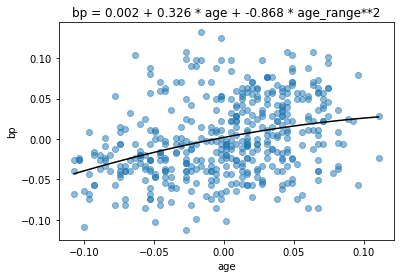

In [20]:
bp_prediction_quadratic = summary_stats['mean']['a'] + summary_stats['mean']['b'] * area_range + summary_stats['mean']['c'] * area_range ** 2

plt.plot(area_range, bp_prediction_quadratic, color='black')
plt.scatter(data_analysis.age, data_analysis.bp, alpha=0.5)
plt.title(f"bp = {summary_stats['mean']['a']:.3f} + {summary_stats['mean']['b']:.3f} * age + {summary_stats['mean']['c']:.3f} * age_range**2")
plt.ylabel('bp')
plt.xlabel('age')
plt.show()

## **Plotting model variability for comparing Linear and Quadratic Models**

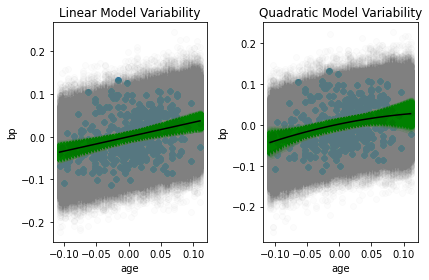

In [21]:
# LINEAR
plt.subplot(1,2,1)
plt.plot(area_range, bp_prediction_linear, color='black')
plt.scatter(data_analysis.age, data_analysis.bp)
plt.title('Linear Model Variability')
plt.ylabel('bp')
plt.xlabel('age')


posterior_samples_linear = multivariate_normal.rvs(
    solution_regression_linear[0],
    solution_regression_linear[1],
    size=10000
)

prediction_range = []
prediction_range_noise = []


for age in area_range:
    pred_mean_data = posterior_samples_linear[:,0]+        posterior_samples_linear[:,1]*age
    prediction_range.append(
        pred_mean_data
    )
    prediction_range_noise.append( norm.rvs(
        pred_mean_data, posterior_samples_linear[:,2]
    )
    )

for i, age in enumerate(area_range):
    scatter = np.repeat(age, 10000)
    plt.scatter(scatter, prediction_range_noise[i], alpha=0.025, color='grey')
    plt.scatter(scatter, prediction_range[i], alpha=0.05, color='green')



# QUADRATIC
plt.subplot(1,2,2)
plt.plot(area_range, bp_prediction_quadratic, color='black')
plt.scatter(data_analysis.age, data_analysis.bp)
plt.title('Quadratic Model Variability')
plt.ylabel('bp')
plt.xlabel('age')


posterior_samples_quadratic = multivariate_normal.rvs(
    solution_regression_quadratic[0],
    solution_regression_quadratic[1],
    size=10000
)

prediction_range = []
prediction_range_noise = []


for age in area_range:
    pred_mean_data = posterior_samples_quadratic[:,0]+        posterior_samples_quadratic[:,1]*age +        posterior_samples_quadratic[:,2]*age**2
    prediction_range.append(
        pred_mean_data
    )
    prediction_range_noise.append( norm.rvs(
        pred_mean_data, posterior_samples_quadratic[:,3]
    )
    )

for i, age in enumerate(area_range):
    scatter = np.repeat(age, 10000)
    plt.scatter(scatter, prediction_range_noise[i], alpha=0.025, color='grey')
    plt.scatter(scatter, prediction_range[i], alpha=0.05, color='green')

plt.tight_layout()
plt.show()

**Plots above shows the overall model variability taking into account the variability of mean prediction (due to regression coefficients) and variability due to modelled noise (sigma). Even though both models appears to cover the data within the scope of model, the variability of mean prediction of Quadratic model is very inconsistent and has high variance for the extreme values of age. Linear model appears to be a better model with less variability in the prediction of posterior mean**

### Predict a 95% confidence interval for the average blood pressure on an individual with mean age (0).

In [22]:
age = 0

prediction_quadratic = []
prediction_linear = []
for i in range(10000):
    prediction_quadratic.append(
        posterior_samples_quadratic[i,0]+        posterior_samples_quadratic[i,1]*age +        posterior_samples_quadratic[i,2]*age**2
    )
    prediction_linear.append(
        posterior_samples_linear[i,0]+        posterior_samples_linear[i,1]*age
    )

#Confidence interval
pred_quantiles_quadratic = np.quantile(prediction_quadratic, q = [0.025, 0.975], axis = 0)
pred_quantiles_linear = np.quantile(prediction_linear, q = [0.025, 0.975], axis = 0)

predictions = pd.DataFrame({'linear':pred_quantiles_linear, 'quadratic': pred_quantiles_quadratic}, index=['lower bound', 'upper bound']).transpose()

predictions['range'] = predictions['upper bound'] - predictions['lower bound']
predictions = predictions.style.set_caption("95% CI for bp on an individual with age 0")

predictions

,lower bound,upper bound,range
linear,-0.004077,0.004065,0.008142
quadratic,-0.003032,0.007068,0.010100


In [23]:
pred_mean_linear = np.mean(prediction_linear)
pred_std_linear = np.std(prediction_linear)
pred_mean_quadratic = np.mean(prediction_quadratic)
pred_std_quadratic = np.std(prediction_quadratic)

print(f'The mean bp prediction by the linear model is {pred_mean_linear} with sd {pred_std_linear}')
print(f'The mean bp prediction by the quadratic model is {pred_mean_quadratic} with sd {pred_std_quadratic}')

The mean bp prediction by the linear model is -1.710014709799317e-05 with sd 0.0020935273298734636
The mean bp prediction by the quadratic model is 0.0020094353871948777 with sd 0.0025789872733759734


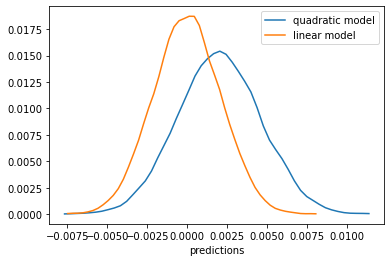

In [24]:
data_density_quadratic = gaussian_kde(prediction_quadratic)
quadratic_range = np.linspace(min(prediction_quadratic), max(prediction_quadratic))
quadratic_prediction = data_density_quadratic(quadratic_range)
plt.plot(quadratic_range,quadratic_prediction/10000, label='quadratic model')

data_density_linear = gaussian_kde(prediction_linear)
quadratic_range = np.linspace(min(prediction_linear), max(prediction_linear))
linear_prediction = data_density_linear(quadratic_range)
plt.plot(quadratic_range, linear_prediction/10000, label='linear model')

plt.xlabel('predictions')
plt.legend()
plt.show()

**As seen from the 95 % CI, the predictions from Linear model has slightly low variance than that of Quadratic model. The mean predictions of Quadratic model is higher than linear model, this is due to concave down nature of Quadratic model at Zero age**